1. 기본 개념
  
 * 미지의 모수 ϴ를 고정된 상수가 아닌 변수로 규정하고, 자료가 관측된 후 자료의 관측치가 주어진 조건하에서 ϴ의 조건부 분포에 기반을 둠
 * 자료 관측 이전의 분포를 사전분포(prior distribution), 자료 관측 이후 자료가 주어진 조건 하에서 분포를 사후분포(posterior distribution)이라고 함
 * 사후분포는 자료 x가 주어졌을 때 ϴ의 조건부 분포이며, 베이즈정리에 의해 사전밀도함수(π(ϴ))와 우도함수(f(x|ϴ))의 곱에 비례하는 것으로 나타낼 수 있음
 * 사전분포와 사후분포가 동일한 분포를 공액사전분포라 하며, 주로 베타분포, 감마분포, 정규분포 등이 적용됨

 ※ (참고) 베타분포: 확률의 확률분포

2. 베타분포의 사후분포 (베르누이 확률에 대한 사후분포 문제)

  * 시행 횟수가 n, 성공 확률이 ϴ이면서 성공횟수 X = x가 관측되었을 때 ϴ의 사전분포로 Beta(a, b)를 가정(a는 성공횟수, b는 실패횟수)하면, ϴ의 사후분포는 Beta(x+a, n-x+b)를 따름
  (사전분포에 성공 횟수와 실패 횟수를 반영하는 의미)
  
  ※ (참고) a = b = 1인 경우 Beta분포는 0과 1 사이의 균일분포를 따름

```
< 예제 > 그동안 20번의 소개팅 결과 애프터를 9번 받았다. 
올해 추가로 13번의 소개팅을 더 해보았더니 4번의 애프터를 받았다. 
사전확률이 베타분포를 따른다고 가정할 때 소개팅 애프터 확률의 사후 평균은 얼마인가?
```

In [1]:
# 확률분포함수 이용

from scipy.stats import beta

# 사전 확률의 평균
x0, n0 = 9,20
prior_mean = beta(x0, n0-x0).mean()

print(f'''사전 분포의 평균은 {prior_mean}''')

# 사후 확률의 평균
x1, n1 = 4, 13
post_mean = beta(x0+x1, n0-x0+n1-x1).mean()

print(f'''사후 분포의 평균은 {post_mean:.2f}''')

사전 분포의 평균은 0.45
사후 분포의 평균은 0.39


In [4]:
# MCMC 이용

# 사후분포(theta | data) = 가능도(data | theta) x 사전분포(theta)
# 베이지안 추정 : 1. 모수적 방법, 2. 비모수적 방법(MCMC 등)
import pymc as pm

x = 4 # 관측된 값
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=9, beta=11) # (사전분포) 'theta의 사전분포'는 과거에 알고 있던 모수 theta 자체의 분포를 뜻함. beta(9, 11)
    likelihood = pm.Binomial('x', p = theta, n = 13, observed = x) # (가능도함수) n = 13, x = 4이며 모수 p 가 theta 분포를 따르는 이항분포

    # 사후분포 추론
    start = pm.find_MAP()
    step = pm.NUTS()
    # MCMC sampling 1000번 수행
    trace = pm.sample(1000, start=start, progressbar=True, random_seed=1234)

pm.summary(trace)

Output()

C:\Users\masta\AppData\Local\Temp\ipykernel_22052\4217276933.py:16: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(1000, start=start, progressbar=True, random_seed=1234)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.394,0.083,0.239,0.549,0.002,0.001,1719.0,2677.0,1.0


3. 감마분포의 사후분포 (횟수에 대한 사후분포 문제)
  * X1, X2, ..., Xn이 독립적으로 평균 ϴ인 포아송 분포 poi(ϴ)를 따르면서 ϴ의 사전분포로 Gamma(a, b)를 가정하면, ϴ의 사후분포는 Gamma(Σxi+a, n+b)를 따름

```
< 예제 > 10분동안 정류장에 도착하는 버스의 수가 포아송 분포를 따르고, 
포아송 분포의 모수는 Gamma(100, 10)을 따른다. 
10분동안 15대의 버스가 도착하였을 때 사후분포와 사후평균을 구하라
```

In [7]:
# 확률분포함수 이용
from scipy.stats import gamma

# scipy.stats의 gamma 함수는 b = 1로 고정되어 있으므로 a/b로 모수를 표현

prior_mean = gamma(100/10).mean()

print(f'''사전 분포의 평균은 {prior_mean}''')

post_mean = gamma((15 + 100)/(1+10)).mean()

print(f'''사후 분포의 평균은 {post_mean:.2f}''')

사전 분포의 평균은 10.0
사후 분포의 평균은 10.45


In [8]:
? pm.Poisson

Init signature:  pm.Poisson(name, *args, **kwargs)
Docstring:     
Poisson log-likelihood.

Often used to model the number of events occurring in a fixed period
of time when the times at which events occur are independent.
The pmf of this distribution is

.. math:: f(x \mid \mu) = \frac{e^{-\mu}\mu^x}{x!}

.. plot::
    :context: close-figs

    import matplotlib.pyplot as plt
    import numpy as np
    import scipy.stats as st
    import arviz as az
    plt.style.use('arviz-darkgrid')
    x = np.arange(0, 15)
    for m in [0.5, 3, 8]:
        pmf = st.poisson.pmf(x, m)
        plt.plot(x, pmf, '-o', label='$\mu$ = {}'.format(m))
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.ylim(0)
    plt.legend(loc=1)
    plt.show()

========  ==========================
Support   :math:`x \in \mathbb{N}_0`
Mean      :math:`\mu`
Variance  :math:`\mu`
========  ==========================

Parameters
----------
mu : tensor_like of float
    Expected number of occurrences 

In [2]:
# MCMC 이용

# 사후분포(theta | data) = 가능도(data | theta) x 사전분포(theta)
# 베이지안 추정 : 1. 모수적 방법, 2. 비모수적 방법(MCMC 등)

import pymc as pm

x = 15
with pm.Model() as model:
    theta = pm.Gamma('theta', alpha = 100, beta=10) # 'theta의 사전분포'는 과거에 알고 있던 모수 theta 자체의 분포를 뜻함. Gamma(100, 10)
    likelihood = pm.Poisson('x', mu = theta, observed = x) # 가능도함수는 x = 15이며 모수 mu 가 theta 분포를 따르는 포아송분포

    # 사후분포 추론
    start = pm.find_MAP()
    step = pm.NUTS()
    # MCMC sampling 1000번 수행
    trace = pm.sample(1000, start=start, progressbar=True, random_seed=1234)

pm.summary(trace)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Output()

C:\Users\masta\AppData\Local\Temp\ipykernel_14044\2748236106.py:17: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(1000, start=start, progressbar=True, random_seed=1234)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,10.473,0.958,8.598,12.224,0.024,0.017,1566.0,2535.0,1.0


3. 정규분포의 사후분포
  * X1, X2, ..., Xn이 평균 ϴ, 분산 $\sigma^2$이면서 분산 $\sigma^2$이 알려진 경우 평균 ϴ의 사전분포로 평균 μ0와 분산 $\sigma_0^2$을 갖는 정규분포를 가정하면 사후분포는 아래와 같음

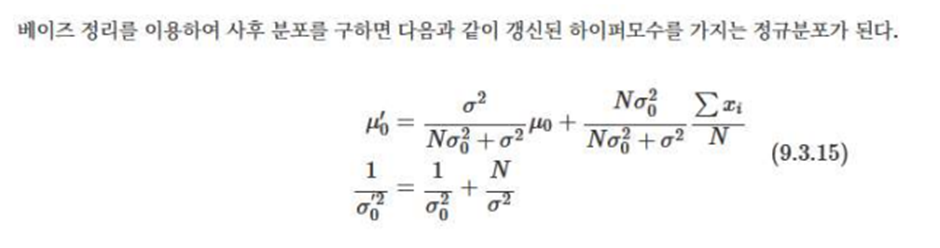

```
< 예제 > 평균이  θ이고 분산이 100인 정규분포의 사전분포가 100, 256일때 120의 값을 가지는 데이터가 있을 경우 사후평균은?
```

In [10]:
# 확률분포함수 이용

print('''사후평균은 위 공식에 따라 산출된다.
여기서 N은 추출한 표본 데이터의 수, sigma2는 모분산, sigma2_0은 사전분포의 분산, mu_0 은 사전분포의 평균을 의미한다.
위 식을 풀어서 설명하면 사전분포의 평균과 표본평균에 대한 모분산과 사전분포분산의 가중평균이라고 할 수 있다.''')

N = 1
sigma2 = 100
mu_0 = 100
sigma2_0 = 256
x = 120

mu_1 = (1/(N*sigma2_0 + sigma2))*(sigma2*mu_0 + N*sigma2_0*120/N)
mu_1

사후평균은 위 공식에 따라 산출된다.
여기서 N은 추출한 표본 데이터의 수, sigma2는 모분산, sigma2_0은 사전분포의 분산, mu_0 은 사전분포의 평균을 의미한다.
위 식을 풀어서 설명하면 사전분포의 평균과 표본평균에 대한 모분산과 사전분포분산의 가중평균이라고 할 수 있다.


114.3820224719101

In [ ]:
# MCMC 이용

# 사후분포(theta | data) = 가능도(data | theta) x 사전분포(theta)
# 베이지안 추정 : 1. 모수적 방법, 2. 비모수적 방법(MCMC 등)
x = 120
with pm.Model() as model:
    theta = pm.Normal('theta', mu=100, sigma=16) # 'theta의 사전분포'는 과거에 알고 있던 모수 theta 자체의 분포를 뜻함. 정규분포 N(100, 256)
    likelihood = pm.Normal('x', mu=theta, sigma=10, observed=x) # data의 분포가 정규분포 N(theta, 100)이므로, 'data의 가능도(data | theta)'

    # 사후분포 추론
    start = pm.find_MAP()
    step = pm.NUTS()
    # MCMC sampling 1000번 수행
    trace = pm.sample(1000, start=start, progressbar=True, random_seed=1234)

pm.summary(trace) # theta 사후분포의 평균은 114.024

Output()

C:\Users\masta\AppData\Local\Temp\ipykernel_22052\4215607013.py:14: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(1000, start=start, progressbar=True, random_seed=1234)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,114.137,8.318,98.234,129.31,0.189,0.134,1936.0,2553.0,1.0


- 사전분포가 정규분포이고 데이터가 주어졌을 때, 사후분포의 평균은?

In [4]:
import numpy as np

y = np.array([5,4,8,9,1,1.5,1.7,1.8,-3,-2.1,-3.8,0.5,0.8,0.9,16,5.8,5.7,2.1,2,0.9,1.2,-0.8,-0.7,-1.8,-2.3,-3.8,-0.7,1.6])  # 사전에 주어진 예시 데이터.
import pymc as pm
with pm.Model() as model:
    theta = pm.Normal('theta', mu=0)
    likelihood = pm.Normal('y', mu=theta, observed=y)

    # inference
    start = pm.find_MAP()
    step = pm.NUTS()
    # Perform MCMC sampling with burn-in of 1000 and 10000 iterations(MCMC)
    trace = pm.sample(draws=100, tune=1000, start=start, progressbar=True, random_seed=1234)

Output()

C:\Users\masta\AppData\Local\Temp\ipykernel_14044\3858527533.py:13: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(draws=100, tune=1000, start=start, progressbar=True, random_seed=1234)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 16 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [5]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,1.74,0.18,1.364,2.053,0.014,0.01,170.0,286.0,1.01
